# Linear Regression - Property Price Train

In [1]:
import pandas as pd

In [155]:
pa = pd.read_csv(r"C:\Users\RahulK\Downloads\Machine Learning By Pranjal Sir\Regression\Linear\Property_Price_Train.csv")

In [156]:
pa.shape

(1459, 81)

In [157]:
pa.head()

,Id,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Lane_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Fireplace_Quality,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Pool_Quality,Fence_Quality,Miscellaneous_Feature,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,1,60,RLD,65.0,8450,Paved,NaN,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,TF,0,NaN,Attchd,2003.0,RFn,2,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RLD,80.0,9600,Paved,NaN,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,TF,1,TA,Attchd,1976.0,RFn,2,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RLD,68.0,11250,Paved,NaN,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,TF,1,TA,Attchd,2001.0,RFn,2,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RLD,60.0,9550,Paved,NaN,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,TF,1,Gd,Detchd,1998.0,Unf,3,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RLD,84.0,14260,Paved,NaN,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,TF,1,TA,Attchd,2000.0,RFn,3,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [158]:
# Sale_Price is your target variable

In [159]:
pa.isnull().sum()

Id                              0
Building_Class                  0
Zoning_Class                    0
Lot_Extent                    259
Lot_Size                        0
Road_Type                       0
Lane_Type                    1368
Property_Shape                  0
Land_Outline                    0
Utility_Type                    0
Lot_Configuration               0
Property_Slope                  0
Neighborhood                    0
Condition1                      0
Condition2                      0
House_Type                      0
House_Design                    0
Overall_Material                0
House_Condition                 0
Construction_Year               0
Remodel_Year                    0
Roof_Design                     0
Roof_Quality                    0
Exterior1st                     0
Exterior2nd                     0
Brick_Veneer_Type               8
Brick_Veneer_Area               8
Exterior_Material               0
Exterior_Condition              0
Foundation_Typ

In [160]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
# In the above code, not all the columns were displayed and hence we are using this method 

In [161]:
pa.isnull().sum()

Id                              0
Building_Class                  0
Zoning_Class                    0
Lot_Extent                    259
Lot_Size                        0
Road_Type                       0
Lane_Type                    1368
Property_Shape                  0
Land_Outline                    0
Utility_Type                    0
Lot_Configuration               0
Property_Slope                  0
Neighborhood                    0
Condition1                      0
Condition2                      0
House_Type                      0
House_Design                    0
Overall_Material                0
House_Condition                 0
Construction_Year               0
Remodel_Year                    0
Roof_Design                     0
Roof_Quality                    0
Exterior1st                     0
Exterior2nd                     0
Brick_Veneer_Type               8
Brick_Veneer_Area               8
Exterior_Material               0
Exterior_Condition              0
Foundation_Typ

In [162]:
# Find the names of only those columns having null
pa.isnull().sum()[pa.isnull().sum() > 0]

Lot_Extent                259
Lane_Type                1368
Brick_Veneer_Type           8
Brick_Veneer_Area           8
Basement_Height            37
Basement_Condition         37
Exposure_Level             38
BsmtFinType1               37
BsmtFinType2               38
Electrical_System           1
Fireplace_Quality         689
Garage                     81
Garage_Built_Year          81
Garage_Finish_Year         81
Garage_Quality             81
Garage_Condition           81
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [163]:
len(pa.isnull().sum()[pa.isnull().sum() > 0])
# Number of columns having nulls

19

In [164]:
pa.isnull().sum()[pa.isnull().sum() * 100 / pa.shape[0] > 40]

# Columns having more than 40% of null values

Lane_Type                1368
Fireplace_Quality         689
Pool_Quality             1452
Fence_Quality            1178
Miscellaneous_Feature    1405
dtype: int64

In [165]:
pa = pa.drop(columns = ['Lane_Type', 'Fireplace_Quality',
                        'Pool_Quality', 'Fence_Quality',
                        'Miscellaneous_Feature', 'Id'])

# Removing the columns having more than 40% of null value

In [166]:
pa.shape

(1459, 75)

In [167]:
pa.isnull().sum()[pa.isnull().sum() > 0]

Lot_Extent            259
Brick_Veneer_Type       8
Brick_Veneer_Area       8
Basement_Height        37
Basement_Condition     37
Exposure_Level         38
BsmtFinType1           37
BsmtFinType2           38
Electrical_System       1
Garage                 81
Garage_Built_Year      81
Garage_Finish_Year     81
Garage_Quality         81
Garage_Condition       81
dtype: int64

In [168]:
pa.Lot_Extent.mean()

70.04583333333333

In [169]:
pa.Lot_Extent.fillna(pa.Lot_Extent.mean() , inplace = True)

In [170]:
pa.Brick_Veneer_Type.value_counts()

# We check the maximum value for non numeric and replace the null with the same values
# And for numeric values we take the mean and replace null values with them

None       863
BrkFace    445
Stone      128
BrkCmn      15
Name: Brick_Veneer_Type, dtype: int64

In [171]:
pa.Lot_Extent = pa.Lot_Extent.fillna(pa.Lot_Extent.mean())
pa.Brick_Veneer_Type = pa.Brick_Veneer_Type.fillna('None')
pa.Brick_Veneer_Area = pa.Brick_Veneer_Area.fillna(pa.Brick_Veneer_Area.mean())
pa.Basement_Height = pa.Basement_Height.fillna('TA')
pa.Basement_Condition = pa.Basement_Condition.fillna('TA')
pa.Exposure_Level = pa.Exposure_Level.fillna('No')
pa.BsmtFinType1 = pa.BsmtFinType1.fillna('Unf')
pa.BsmtFinType2 = pa.BsmtFinType2.fillna('Unf')
pa.Electrical_System = pa.Electrical_System.fillna('SBrkr')
pa.Garage = pa.Garage.fillna('Attchd')
pa.Garage_Built_Year = pa.Garage_Built_Year.fillna(pa.Garage_Built_Year.mean())
pa.Garage_Finish_Year = pa.Garage_Finish_Year.fillna('Unf')
pa.Garage_Quality = pa.Garage_Quality.fillna('TA')
pa.Garage_Condition = pa.Garage_Condition.fillna('TA')

In [172]:
pa.isnull().sum()[pa.isnull().sum() > 0]

# Checking if any null values are still present and we found no null in the output

Series([], dtype: int64)

In [173]:
pa.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,RLD,65.0,8450,Paved,Reg,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,SS,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PC,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,TF,0,Attchd,2003.0,RFn,2,1085.793744,TA,TA,Y,163.788080,69.596115,20.337934,0,0,0,0,2,2008,WD,Normal,208500
1,20,RLD,80.0,9600,Paved,Reg,Lvl,AllPub,FR2P,GS,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,SS,MetalSd,MetalSd,None,0.0,TA,TA,CB,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,TF,1,Attchd,1976.0,RFn,2,196.316304,TA,TA,Y,198.900074,74.716033,15.039392,0,0,0,0,5,2007,WD,Normal,181500
2,60,RLD,68.0,11250,Paved,IR1,Lvl,AllPub,I,GS,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,SS,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PC,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,TF,1,Attchd,2001.0,RFn,2,218.068403,TA,TA,Y,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,WD,Normal,223500
3,70,RLD,60.0,9550,Paved,IR1,Lvl,AllPub,C,GS,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,SS,Wd Sdng,Wd Shng,None,0.0,TA,TA,BT,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,TF,1,Detchd,1998.0,Unf,3,696.996439,TA,TA,Y,46.948018,40.181415,60.921821,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RLD,84.0,14260,Paved,IR1,Lvl,AllPub,FR2P,GS,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,SS,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PC,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,TF,1,Attchd,2000.0,RFn,3,568.859882,TA,TA,Y,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,WD,Normal,250000


In [174]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# Importing Label Encoder

### Converting non numeric into numeric with Label Encoder

In [175]:
pa.Zoning_Class.value_counts()

RLD       1150
RMD        218
FVR         65
RHD         16
Commer      10
Name: Zoning_Class, dtype: int64

In [176]:
pa.Zoning_Class = le.fit_transform(pa.Zoning_Class)

In [177]:
pa.Zoning_Class.value_counts()

3    1150
4     218
1      65
2      16
0      10
Name: Zoning_Class, dtype: int64

In [178]:
pa.select_dtypes(include = ['object']).columns

# This will give me result of those columns which are non numeric

Index(['Road_Type', 'Property_Shape', 'Land_Outline', 'Utility_Type',
       'Lot_Configuration', 'Property_Slope', 'Neighborhood', 'Condition1',
       'Condition2', 'House_Type', 'House_Design', 'Roof_Design',
       'Roof_Quality', 'Exterior1st', 'Exterior2nd', 'Brick_Veneer_Type',
       'Exterior_Material', 'Exterior_Condition', 'Foundation_Type',
       'Basement_Height', 'Basement_Condition', 'Exposure_Level',
       'BsmtFinType1', 'BsmtFinType2', 'Heating_Type', 'Heating_Quality',
       'Air_Conditioning', 'Electrical_System', 'Kitchen_Quality',
       'Functional_Rate', 'Garage', 'Garage_Finish_Year', 'Garage_Quality',
       'Garage_Condition', 'Pavedd_Drive', 'Sale_Type', 'Sale_Condition'],
      dtype='object')

In [179]:
pa[pa.select_dtypes(include = ['object']).columns] = pa[pa.select_dtypes(include = ['object']).columns].apply(le.fit_transform)

# This will change the entire non numeric column into numeric and we do not need to label encode every single column

In [180]:
pa.head()

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition,Sale_Price
0,60,3,65.0,8450,1,3,3,0,4,0,5,2,2,0,5,7,5,2003,2003,1,4,12,13,1,196.0,2,4,2,2,3,3,2,706,5,0,150,856,1,0,1,4,856,854,0,1710,1,0,2,1,3,1,2,8,7,0,2,2003.0,1,2,1085.793744,4,4,2,163.788080,69.596115,20.337934,0,0,0,0,2,2008,8,4,208500
1,20,3,80.0,9600,1,3,3,0,2,0,24,1,2,0,2,6,8,1976,1976,1,4,8,8,2,0.0,3,4,1,2,3,1,0,978,5,0,284,1262,1,0,1,4,1262,0,0,1262,0,1,2,0,3,1,3,6,7,1,2,1976.0,1,2,196.316304,4,4,2,198.900074,74.716033,15.039392,0,0,0,0,5,2007,8,4,181500
2,60,3,68.0,11250,1,0,3,0,4,0,5,2,2,0,5,7,5,2001,2002,1,4,12,13,1,162.0,2,4,2,2,3,2,2,486,5,0,434,920,1,0,1,4,920,866,0,1786,1,0,2,1,3,1,2,6,7,1,2,2001.0,1,2,218.068403,4,4,2,26.127533,32.085268,-46.232198,0,0,0,0,9,2008,8,4,223500
3,70,3,60.0,9550,1,0,3,0,0,0,6,2,2,0,5,7,5,1915,1970,1,4,13,15,2,0.0,3,4,0,3,1,3,0,216,5,0,540,756,1,2,1,4,961,756,0,1717,1,0,1,0,3,1,2,7,7,1,6,1998.0,2,3,696.996439,4,4,2,46.948018,40.181415,60.921821,0,0,0,0,2,2006,8,0,140000
4,60,3,84.0,14260,1,0,3,0,2,0,15,2,2,0,5,8,5,2000,2000,1,4,12,13,1,350.0,2,4,2,2,3,0,2,655,5,0,490,1145,1,0,1,4,1145,1053,0,2198,1,0,2,1,4,1,2,9,7,1,2,2000.0,1,3,568.859882,4,4,2,-10.626105,20.755323,21.788818,0,0,0,0,12,2008,8,4,250000


In [181]:
pa.dtypes

Building_Class                 int64
Zoning_Class                   int32
Lot_Extent                   float64
Lot_Size                       int64
Road_Type                      int32
Property_Shape                 int32
Land_Outline                   int32
Utility_Type                   int32
Lot_Configuration              int32
Property_Slope                 int32
Neighborhood                   int32
Condition1                     int32
Condition2                     int32
House_Type                     int32
House_Design                   int32
Overall_Material               int64
House_Condition                int64
Construction_Year              int64
Remodel_Year                   int64
Roof_Design                    int32
Roof_Quality                   int32
Exterior1st                    int32
Exterior2nd                    int32
Brick_Veneer_Type              int32
Brick_Veneer_Area            float64
Exterior_Material              int32
Exterior_Condition             int32
F

In [182]:
pa.dtypes[pa.dtypes == 'object']
# Checking for any non numeric data types

Series([], dtype: object)

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
pa_train , pa_test = train_test_split(pa, test_size = .2)

In [32]:
pa_train_x = pa_train.iloc[: , 0:-1]
pa_train_y = pa_train.iloc[: , -1]

In [33]:
pa_train_x.head(1)

,Building_Class,Zoning_Class,Lot_Extent,Lot_Size,Road_Type,Property_Shape,Land_Outline,Utility_Type,Lot_Configuration,Property_Slope,Neighborhood,Condition1,Condition2,House_Type,House_Design,Overall_Material,House_Condition,Construction_Year,Remodel_Year,Roof_Design,Roof_Quality,Exterior1st,Exterior2nd,Brick_Veneer_Type,Brick_Veneer_Area,Exterior_Material,Exterior_Condition,Foundation_Type,Basement_Height,Basement_Condition,Exposure_Level,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,Total_Basement_Area,Heating_Type,Heating_Quality,Air_Conditioning,Electrical_System,First_Floor_Area,Second_Floor_Area,LowQualFinSF,Grade_Living_Area,Underground_Full_Bathroom,Underground_Half_Bathroom,Full_Bathroom_Above_Grade,Half_Bathroom_Above_Grade,Bedroom_Above_Grade,Kitchen_Above_Grade,Kitchen_Quality,Rooms_Above_Grade,Functional_Rate,Fireplaces,Garage,Garage_Built_Year,Garage_Finish_Year,Garage_Size,Garage_Area,Garage_Quality,Garage_Condition,Pavedd_Drive,W_Deck_Area,Open_Lobby_Area,Enclosed_Lobby_Area,Three_Season_Lobby_Area,Screen_Lobby_Area,Pool_Area,Miscellaneous_Value,Month_Sold,Year_Sold,Sale_Type,Sale_Condition
1019,120,3,43.0,3013,1,3,3,0,4,0,0,2,2,4,2,7,5,2005,2005,1,4,12,13,1,145.0,2,4,2,2,3,1,2,16,5,0,1346,1362,1,0,1,4,1506,0,0,1506,0,0,2,0,2,1,2,6,7,1,2,2005.0,0,2,928.632194,4,4,2,-38.528331,7.001218,21.378363,0,0,0,0,4,2006,8,4


In [34]:
pa_test_x = pa_test.iloc[: , 0:-1]
pa_test_y = pa_test.iloc[: , -1]

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
linreg_pa = LinearRegression()

In [37]:
linreg_pa.fit(pa_train_x,pa_train_y)

LinearRegression()

In [38]:
Rsquare = linreg_pa.score(pa_train_x,pa_train_y)
Rsquare

0.8548798608166814

In [39]:
N = pa_train_x.shape[0]
K = pa_train_x.shape[1]

AdjRsquare = 1 - (1-Rsquare) * (N-1) / (N-K-1)
AdjRsquare

0.8450457121907056

In [40]:
pred_train_pa = linreg_pa.predict(pa_train_x)
pred_test_pa = linreg_pa.predict(pa_test_x)

In [41]:
err_train_pa = pa_train_y - pred_train_pa
err_test_pa = pa_test_y - pred_test_pa

In [42]:
# Now lets check the assumption

In [43]:
import numpy as np

In [44]:
np.mean(err_train_pa)

# Hence, mean of the error is near to zero

5.005759082498363e-10

In [45]:
import seaborn as sns

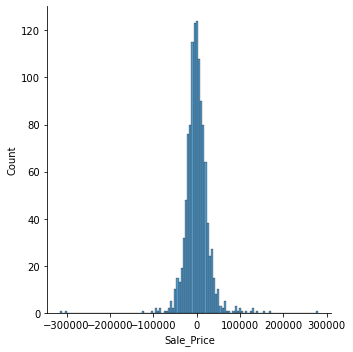

In [46]:
sns.displot(err_train_pa)

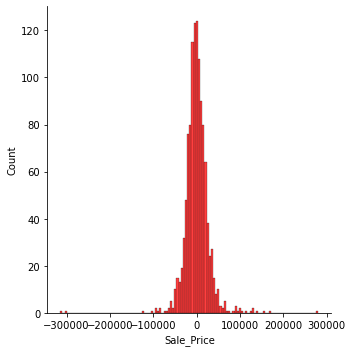

In [47]:
sns.displot(err_train_pa, color = 'r')

# We can see lot of errors far away from the mean and we will check the outliers

C:\Users\RahulK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sale_Price'>

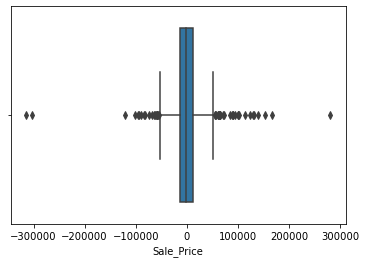

In [48]:
sns.boxplot(err_train_pa)

# We cannot ignore the outliers here as they are very far away from the mean

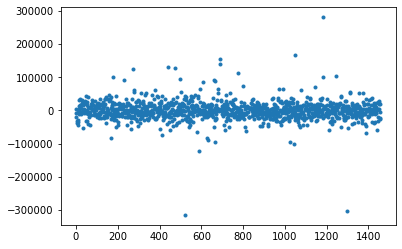

In [49]:
import matplotlib.pyplot as plt
plt.plot(err_train_pa , ".")

In [50]:
pred_act_pa = pd.DataFrame()

In [51]:
pred_act_pa['Actual'] = pa_train_y
pred_act_pa['Predicted'] = pred_train_pa

C:\Users\RahulK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

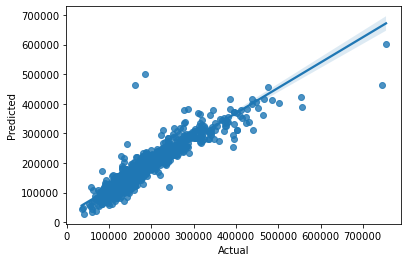

In [52]:
sns.regplot(pred_act_pa['Actual'],pred_act_pa['Predicted'])

# We can see that their is a pattern in the error terms and variance is not same throughout as seen below

{'whiskers': [<matplotlib.lines.Line2D at 0x169b8a5e340>,
 'caps': [<matplotlib.lines.Line2D at 0x169b8a5e8e0>,
 'boxes': [<matplotlib.lines.Line2D at 0x169b8a5e070>],
 'medians': [<matplotlib.lines.Line2D at 0x169b8a5ee80>],
 'fliers': [<matplotlib.lines.Line2D at 0x169b8a6e190>],
 'means': []}

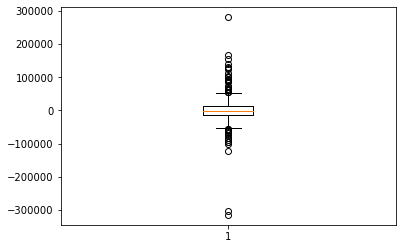

In [53]:
plt.boxplot(err_train_pa)

In [54]:
# Lets evaluate the model in test data
# MSE
# RMSE
# MAE
# MAPE

In [55]:
MSE_test = np.mean(np.square(err_test_pa))
MSE_test


1111298298.419844

In [56]:
RMSE_test = np.sqrt(MSE_test)
RMSE_test

33336.14102471736

In [57]:
MAE_test = np.mean(np.absolute(err_test_pa))
MAE_test

21233.16886374576

In [58]:
MAPE_test = np.mean(np.absolute(err_test_pa * 100/pa_test_y))
MAPE_test

12.215849738699687

In [59]:
Accuracy_test = 100 - MAPE_test
Accuracy_test

87.78415026130031

In [60]:
def remove_outliers(df,col,k):
    mean = df[col].mean()
    global df1 
    sd = df[col].std()
    final_list = [x for x in df[col] if (x > mean - k * sd)]
    final_list = [x for x in final_list if (x < mean + k * sd)]
    df1 = df.loc[df[col].isin(final_list)] ; print(df1.shape)
    print("Number of outliers removed == >" , df.shape[0] - df1.shape[0])

In [62]:
pa.shape

(1459, 75)

#### remove_outliers(pa, 'Sale_Price',2)

#### We are not removing outliers right now as we first need to remove the insignificant x variables

In [61]:
pa.Sale_Price.describe()

count      1459.000000
mean     180944.102810
std       79464.918335
min       34900.000000
25%      129950.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: Sale_Price, dtype: float64

In [62]:
# We build the model for the 1st time using 74 x variables (almost all x variables)

# Because we dont know which x variable may be important / significant (some x variables may have more relation with y and some may have less relation with y and some may be insignificant)

# What are the 2 main aim of building the model?(Evaluation)
 # 1. To get the model which has high performance
 # 2. My model should be as simple as possible(so that we can interpret it and make business decisions)





In [185]:
pa_train , pa_test = train_test_split(pa, test_size = .2)

# We will run from here to check the value of Rsquare and Adj Rsquare after removing x variables

In [186]:
pa_train_x = pa_train.iloc[: , 0:-1]
pa_train_y = pa_train.iloc[: , -1]

In [187]:
pa_test_x = pa_test.iloc[: , 0:-1]
pa_test_y = pa_test.iloc[: , -1]

In [188]:
linreg_pa = LinearRegression()

In [189]:
linreg_pa.fit(pa_train_x,pa_train_y)

LinearRegression()

In [190]:
Rsquare = linreg_pa.score(pa_train_x,pa_train_y)
Rsquare

0.8623816474515923

In [191]:
N = pa_train_x.shape[0]
K = pa_train_x.shape[1]

AdjRsquare = 1 - (1-Rsquare) * (N-1) / (N-K-1)
AdjRsquare

0.8568572711227088

In [91]:
pred_train_pa = linreg_pa.predict(pa_train_x)
pred_test_pa = linreg_pa.predict(pa_test_x)

In [92]:
err_train_pa = pa_train_y - pred_train_pa
err_test_pa = pa_test_y - pred_test_pa

In [93]:
np.mean(err_train_pa)


-1.4714018825598015e-11

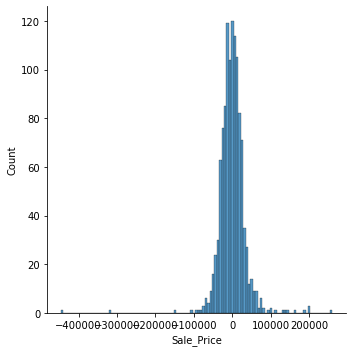

In [94]:
sns.displot(err_train_pa)

C:\Users\RahulK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sale_Price'>

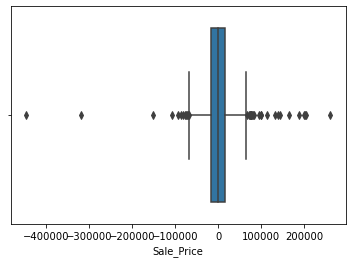

In [95]:
sns.boxplot(err_train_pa)


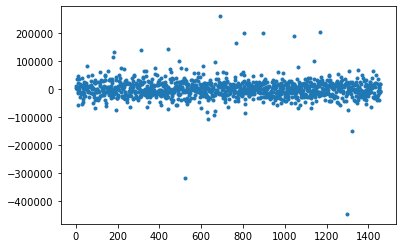

In [96]:
plt.plot(err_train_pa , ".")

In [97]:
pred_act_pa = pd.DataFrame()

In [98]:
pred_act_pa['Actual'] = pa_train_y
pred_act_pa['Predicted'] = pred_train_pa

C:\Users\RahulK\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Actual', ylabel='Predicted'>

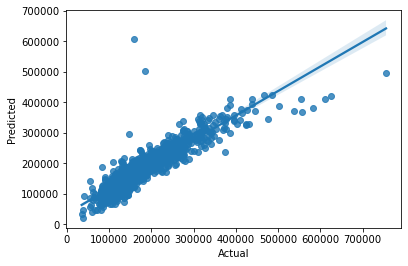

In [99]:
sns.regplot(pred_act_pa['Actual'],pred_act_pa['Predicted'])

In [100]:
MSE_test = np.mean(np.square(err_test_pa))
MSE_test


1266687108.8325517

In [101]:
RMSE_test = np.sqrt(MSE_test)
RMSE_test

35590.54802658357

In [102]:
MAE_test = np.mean(np.absolute(err_test_pa))
MAE_test

22883.344686364486

In [103]:
MAPE_test = np.mean(np.absolute(err_test_pa * 100/pa_test_y))
MAPE_test

13.37690590217768

In [104]:
Accuracy_test = 100 - MAPE_test
Accuracy_test

86.62309409782232

In [63]:
# We will build th model once more but this time lets use only the significant variables

# How can we find which variable is more significant with respect to x??

# Co-relation (-1 to +1), High co-relation towards -1 or +1, low co-relation towards 0.

# Lets find co-relation of all x variables w.r.t. to y

In [64]:
pa.Sale_Price.corr(pa.Month_Sold)

0.04640093062095691

In [65]:
l1 = list(pa_train_x.columns)
l1

['Building_Class',
 'Zoning_Class',
 'Lot_Extent',
 'Lot_Size',
 'Road_Type',
 'Property_Shape',
 'Land_Outline',
 'Utility_Type',
 'Lot_Configuration',
 'Property_Slope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'House_Type',
 'House_Design',
 'Overall_Material',
 'House_Condition',
 'Construction_Year',
 'Remodel_Year',
 'Roof_Design',
 'Roof_Quality',
 'Exterior1st',
 'Exterior2nd',
 'Brick_Veneer_Type',
 'Brick_Veneer_Area',
 'Exterior_Material',
 'Exterior_Condition',
 'Foundation_Type',
 'Basement_Height',
 'Basement_Condition',
 'Exposure_Level',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'Total_Basement_Area',
 'Heating_Type',
 'Heating_Quality',
 'Air_Conditioning',
 'Electrical_System',
 'First_Floor_Area',
 'Second_Floor_Area',
 'LowQualFinSF',
 'Grade_Living_Area',
 'Underground_Full_Bathroom',
 'Underground_Half_Bathroom',
 'Full_Bathroom_Above_Grade',
 'Half_Bathroom_Above_Grade',
 'Bedroom_Above_Grade',
 'Kitchen_Above_Grade',
 

In [66]:
for col in l1:
    print(pa.Sale_Price.corr(pa[col]))

-0.08456301966211516
-0.1668955846437795
0.3349915572633437
0.2638429115653824
0.041056614720661216
-0.2554281662121093
0.015545476680864291
-0.014322720379449675
-0.06723411469850411
0.051091134606797206
0.21066738094499127
0.0911500177581627
0.0075040367869877046
-0.08571953986642523
0.1800350156150956
0.7909716467394388
-0.07775438478976242
0.5228769120219531
0.5070150990338165
0.2222954138300095
0.13461055882939263
0.10327572005551174
0.10347146638224837
0.018329466318488894
0.4751597164560668
-0.6372789669363335
0.11742017525642524
0.34563048207598457
-0.6179695452886429
0.05264902555798228
-0.29528328006238336
-0.09242304457955809
0.386782893996429
0.03274030280451556
-0.010951894872735598
0.2142805069035147
0.6137915322845583
-0.09885408095416423
-0.40013491864694806
0.25142551626694776
0.23505380066954773
0.6059707799412586
0.3191929834906513
-0.025642496543470478
0.7085842563886098
0.22755130379947322
-0.01691505059597599
0.560604113107892
0.284626062633006
0.16827215579622776

In [67]:
corr_list = []
for col in l1:
    corr_list.append(pa.Sale_Price.corr(pa[col]))

In [68]:
df2 = pd.DataFrame()

In [69]:
df2['Name_of_col'] = l1
df2['correlation'] = corr_list 

In [70]:
df2

,Name_of_col,correlation
0,Building_Class,-0.084563
1,Zoning_Class,-0.166896
2,Lot_Extent,0.334992
3,Lot_Size,0.263843
4,Road_Type,0.041057
5,Property_Shape,-0.255428
6,Land_Outline,0.015545
7,Utility_Type,-0.014323
8,Lot_Configuration,-0.067234
9,Property_Slope,0.051091


In [71]:
df2[(df2.correlation > .4) | (df2.correlation < -.4)]

,Name_of_col,correlation
15,Overall_Material,0.790972
17,Construction_Year,0.522877
18,Remodel_Year,0.507015
24,Brick_Veneer_Area,0.475160
25,Exterior_Material,-0.637279
28,Basement_Height,-0.617970
36,Total_Basement_Area,0.613792
38,Heating_Quality,-0.400135
41,First_Floor_Area,0.605971
44,Grade_Living_Area,0.708584


In [72]:
df3 = df2[(df2.correlation > .4) | (df2.correlation < -.4)]

In [149]:
df3.Name_of_col

1                  Zoning_Class
2                    Lot_Extent
3                      Lot_Size
5                Property_Shape
10                 Neighborhood
14                 House_Design
15             Overall_Material
17            Construction_Year
18                 Remodel_Year
19                  Roof_Design
20                 Roof_Quality
21                  Exterior1st
22                  Exterior2nd
24            Brick_Veneer_Area
25            Exterior_Material
26           Exterior_Condition
27              Foundation_Type
28              Basement_Height
30               Exposure_Level
32                   BsmtFinSF1
35                    BsmtUnfSF
36          Total_Basement_Area
38              Heating_Quality
39             Air_Conditioning
40            Electrical_System
41             First_Floor_Area
42            Second_Floor_Area
44            Grade_Living_Area
45    Underground_Full_Bathroom
47    Full_Bathroom_Above_Grade
48    Half_Bathroom_Above_Grade
49      

In [150]:
l2 = list(df3.Name_of_col)

In [151]:
l2

['Zoning_Class',
 'Lot_Extent',
 'Lot_Size',
 'Property_Shape',
 'Neighborhood',
 'House_Design',
 'Overall_Material',
 'Construction_Year',
 'Remodel_Year',
 'Roof_Design',
 'Roof_Quality',
 'Exterior1st',
 'Exterior2nd',
 'Brick_Veneer_Area',
 'Exterior_Material',
 'Exterior_Condition',
 'Foundation_Type',
 'Basement_Height',
 'Exposure_Level',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'Total_Basement_Area',
 'Heating_Quality',
 'Air_Conditioning',
 'Electrical_System',
 'First_Floor_Area',
 'Second_Floor_Area',
 'Grade_Living_Area',
 'Underground_Full_Bathroom',
 'Full_Bathroom_Above_Grade',
 'Half_Bathroom_Above_Grade',
 'Bedroom_Above_Grade',
 'Kitchen_Above_Grade',
 'Kitchen_Quality',
 'Rooms_Above_Grade',
 'Functional_Rate',
 'Fireplaces',
 'Garage',
 'Garage_Built_Year',
 'Garage_Finish_Year',
 'Garage_Size',
 'Garage_Condition',
 'Pavedd_Drive',
 'Screen_Lobby_Area',
 'Sale_Condition']

In [76]:
# Lets build the model with only these x variables

In [152]:
l2.append('Sale_Price')

In [153]:
l2

['Zoning_Class',
 'Lot_Extent',
 'Lot_Size',
 'Property_Shape',
 'Neighborhood',
 'House_Design',
 'Overall_Material',
 'Construction_Year',
 'Remodel_Year',
 'Roof_Design',
 'Roof_Quality',
 'Exterior1st',
 'Exterior2nd',
 'Brick_Veneer_Area',
 'Exterior_Material',
 'Exterior_Condition',
 'Foundation_Type',
 'Basement_Height',
 'Exposure_Level',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'Total_Basement_Area',
 'Heating_Quality',
 'Air_Conditioning',
 'Electrical_System',
 'First_Floor_Area',
 'Second_Floor_Area',
 'Grade_Living_Area',
 'Underground_Full_Bathroom',
 'Full_Bathroom_Above_Grade',
 'Half_Bathroom_Above_Grade',
 'Bedroom_Above_Grade',
 'Kitchen_Above_Grade',
 'Kitchen_Quality',
 'Rooms_Above_Grade',
 'Functional_Rate',
 'Fireplaces',
 'Garage',
 'Garage_Built_Year',
 'Garage_Finish_Year',
 'Garage_Size',
 'Garage_Condition',
 'Pavedd_Drive',
 'Screen_Lobby_Area',
 'Sale_Condition',
 'Sale_Price']

In [79]:
pa_practice = pa.loc[:,l2]

# New pa with only above x variables 

In [80]:
pa_practice.columns

Index(['Overall_Material', 'Construction_Year', 'Remodel_Year',
       'Brick_Veneer_Area', 'Exterior_Material', 'Basement_Height',
       'Total_Basement_Area', 'Heating_Quality', 'First_Floor_Area',
       'Grade_Living_Area', 'Full_Bathroom_Above_Grade', 'Kitchen_Quality',
       'Rooms_Above_Grade', 'Fireplaces', 'Garage_Built_Year',
       'Garage_Finish_Year', 'Garage_Size', 'Sale_Price'],
      dtype='object')

In [81]:
pa_practice.shape

(1459, 18)

In [82]:
pa = pa_practice

In [83]:
pa.shape


# Run the program again from remove outliers, without removing the outliers

(1459, 18)

In [105]:
df3 = df2[(df2.correlation > .2) | (df2.correlation < -.2)]

# since the value of Rsquare degraded drastically we have to let in more x variables

In [106]:
l2 = list(df3.Name_of_col)

In [107]:
l2.append('Sale_Price')

In [109]:
l2

['Lot_Extent',
 'Lot_Size',
 'Property_Shape',
 'Neighborhood',
 'Overall_Material',
 'Construction_Year',
 'Remodel_Year',
 'Roof_Design',
 'Brick_Veneer_Area',
 'Exterior_Material',
 'Foundation_Type',
 'Basement_Height',
 'Exposure_Level',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'Total_Basement_Area',
 'Heating_Quality',
 'Air_Conditioning',
 'Electrical_System',
 'First_Floor_Area',
 'Second_Floor_Area',
 'Grade_Living_Area',
 'Underground_Full_Bathroom',
 'Full_Bathroom_Above_Grade',
 'Half_Bathroom_Above_Grade',
 'Kitchen_Quality',
 'Rooms_Above_Grade',
 'Fireplaces',
 'Garage',
 'Garage_Built_Year',
 'Garage_Finish_Year',
 'Garage_Size',
 'Pavedd_Drive',
 'Sale_Condition',
 'Sale_Price']

In [154]:
len(l2)

46

In [184]:
pa.shape

(1459, 46)

In [183]:
pa = pa.loc[:,l2]

In [148]:
df3 = df2[(df2.correlation > .1) | (df2.correlation < -.1)]

In [ ]:
# When we use 75 columns Rsquare was 0.8548
# When we use 35 columns Rsquare was 0.8196
# When we use 46 columns Rsquare was 0.8623

# And now we can remove the outliers